# Лабораторная работа №2

ФИО: Егоров Вадим Евгеньевич   
Группа: БИВТ-21-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

Ссылка на датасет: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict.csv

In [3]:
import numpy as np
import pandas as pd

In [4]:
path_to_dataset = r'C:\Users\vadim\Documents\nn\Admission_Predict.csv'

In [5]:
data = pd.read_csv(path_to_dataset, sep=',')

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Описание постановки задачи

 Задача: набор данных создан для прогнозирования приема в магистратуру с точки зрения Индии  

 Переменные:   

1.   GRE Scores ( out of 340 )
2.   TOEFL Scores ( out of 120 )
3.   University Rating ( out of 5 )
4.   Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5.   Undergraduate GPA ( out of 10 )
6.   Research Experience ( either 0 or 1 )
7.   Chance of Admit ( ranging from 0 to 1 )

Набор признаков (X) - 1-6  
Целевая переменная (Y) - 7  

Целевое событие дискретно ([0; 1])  



In [7]:
Y = data['Chance of Admit ']
# Y = data[['Chance of Admit ']]
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [8]:
X = data.iloc[:, 1:8]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


## 3. Распределение целевой переменной

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: >

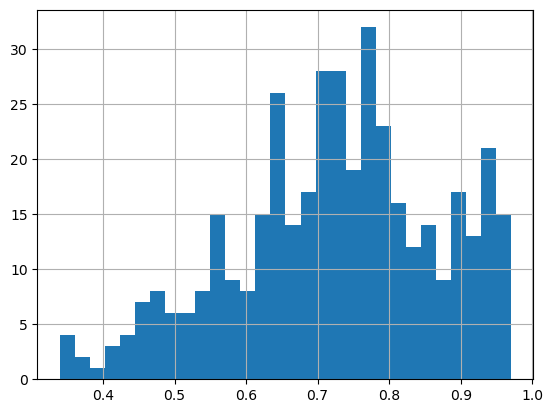

In [10]:
Y.hist(bins=30)

По гистограмме видно, что у целевой переменной значения больше 0.3. И основная часть значений находится в промежутке (0.6; 1.0), причем больше всего значений на промежутке от 0.6 до 0.8.

In [11]:
Y.nunique() #уникальных значений

60

In [12]:
Y.count() #всего значений

400

##4. Основная статистика по переменным

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


##5. Основная информация по датасету

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


##6. Пропуски

In [15]:
pd.isna(data).sum()  #data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Пропусков нету, значит датасет качественный. Если бы пропуски были, их можно было бы заменить средними значениями по переменным (или медианами).

##7. Гистограммы признаков

<Axes: >

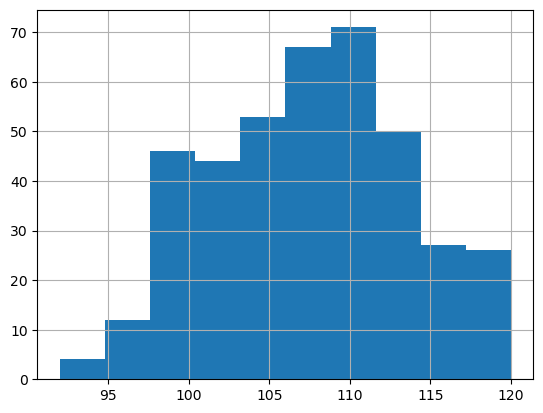

In [16]:
data['TOEFL Score'].hist()

Основное количество значений в промежутке [97; 115], а пик в промежутке [105; 112]

<Axes: >

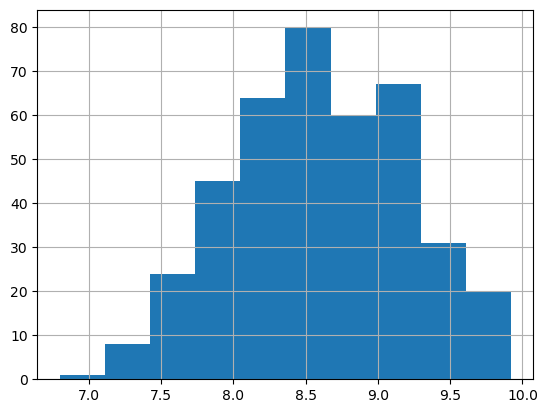

In [17]:
data['CGPA'].hist()

В промежутке [7.0; 10.0] значения распределены близко к нормальному.

<Axes: >

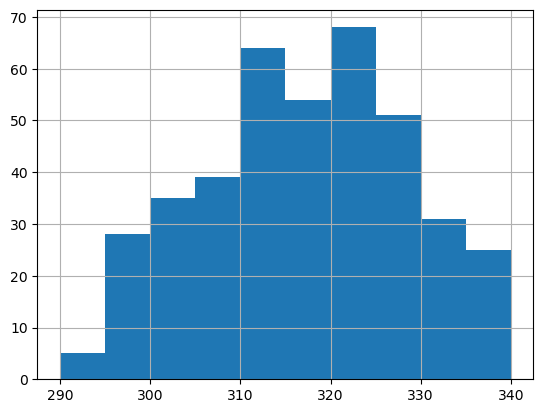

In [18]:
data['GRE Score'].hist()

Большая часть значений в промежутке [300; 330]

<Axes: >

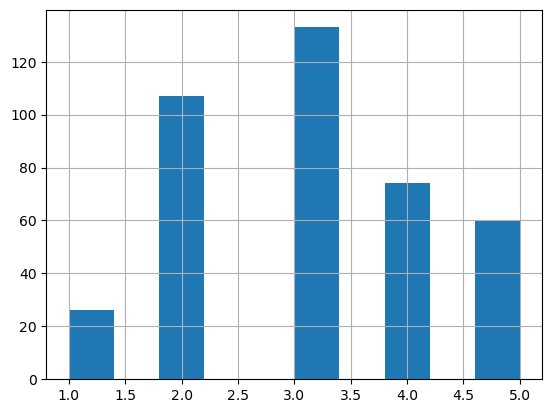

In [19]:
data['University Rating'].hist()

Больше всего значений 3; а меньше всего 1.

<Axes: >

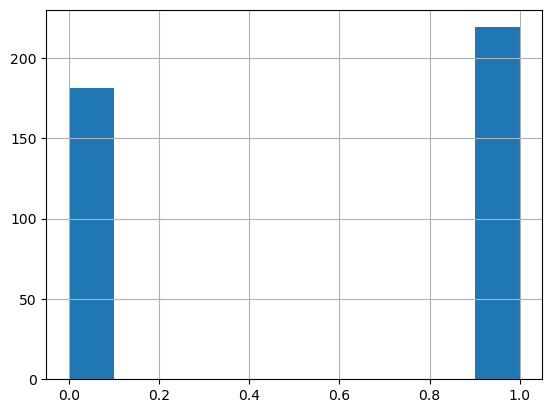

In [20]:
data['Research'].hist()

Значений 1 немного больше, чем значений 0.

##8. Графики зависимости переменных от целевой переменной

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

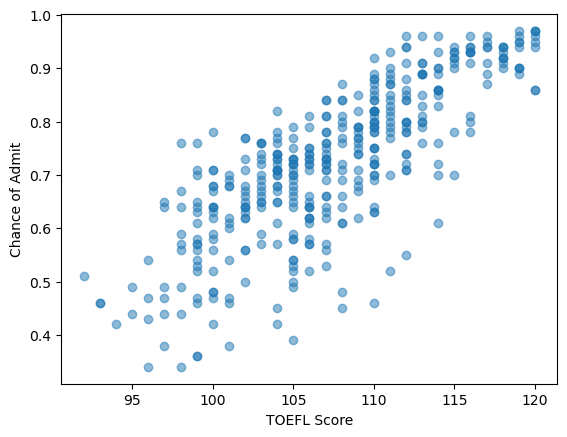

In [22]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['TOEFL Score'], Y, alpha=0.5)
ax.set_xlabel('TOEFL Score')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

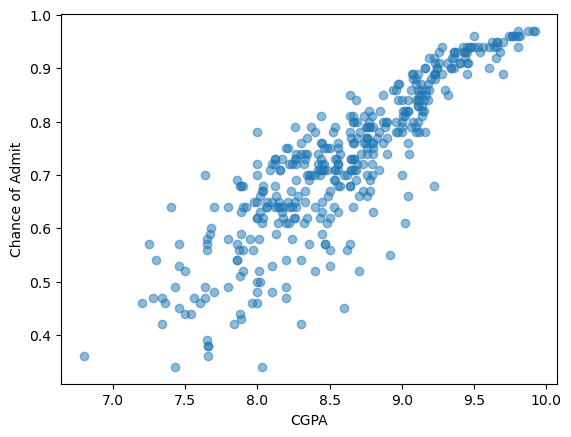

In [23]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['CGPA'], Y, alpha=0.5)
ax.set_xlabel('CGPA')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

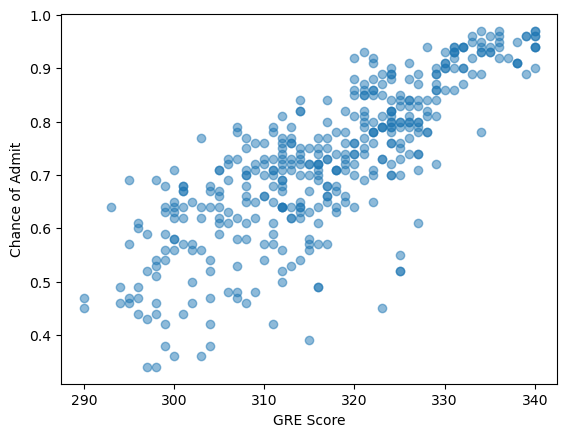

In [24]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['GRE Score'], Y, alpha=0.5)
ax.set_xlabel('GRE Score')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

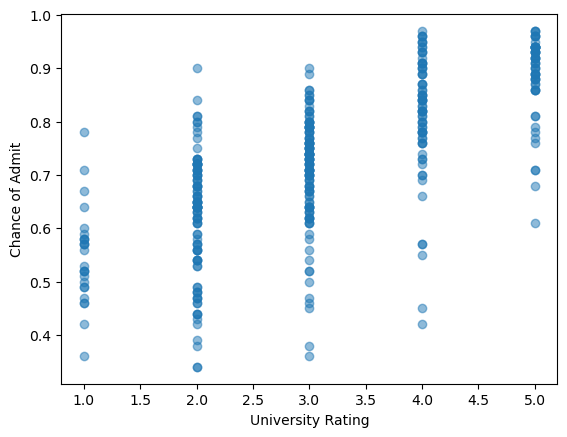

In [25]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['University Rating'], Y, alpha=0.5)
ax.set_xlabel('University Rating')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

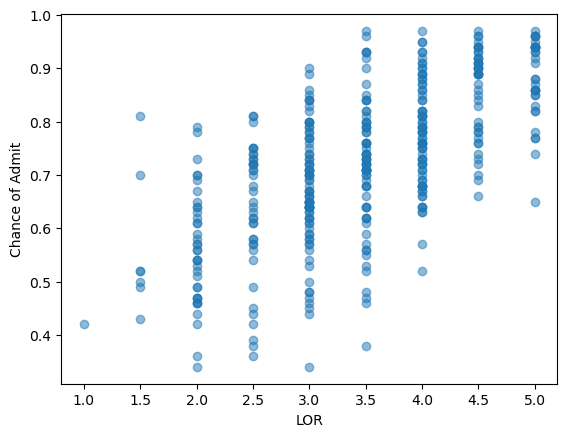

In [26]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['LOR '], Y, alpha=0.5)
ax.set_xlabel('LOR')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

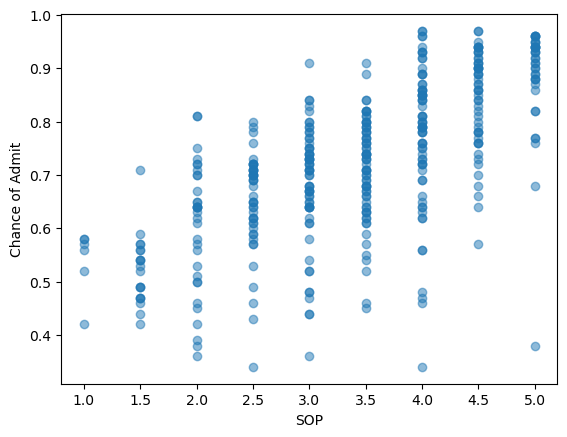

In [27]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['SOP'], Y, alpha=0.5)
ax.set_xlabel('SOP')
ax.set_ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

<Figure size 1600x1200 with 0 Axes>

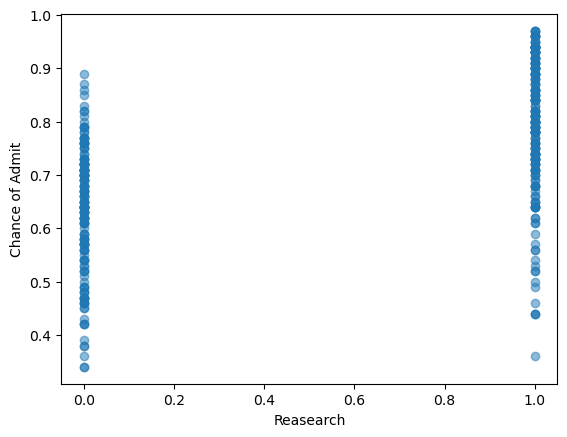

In [28]:
plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()
ax.scatter(data['Research'], Y, alpha=0.5)
ax.set_xlabel('Reasearch')
ax.set_ylabel('Chance of Admit')

Вывод:  
Можно увидеть, что все переменные зависят от целевой переменной линейно (при увеличении Y, увеличивается X) в той или иной степени.   
Для прогнозирования можно взять переменные: 'CGPA', 'GRE Score'.   
Также можно взять 'TOEFL score', 'University Rating'.  
Остальные переменные также имеют взаимосвязь с Y-переменной, просто менее сильную, но она всё равно просматривается.

##9. Extra

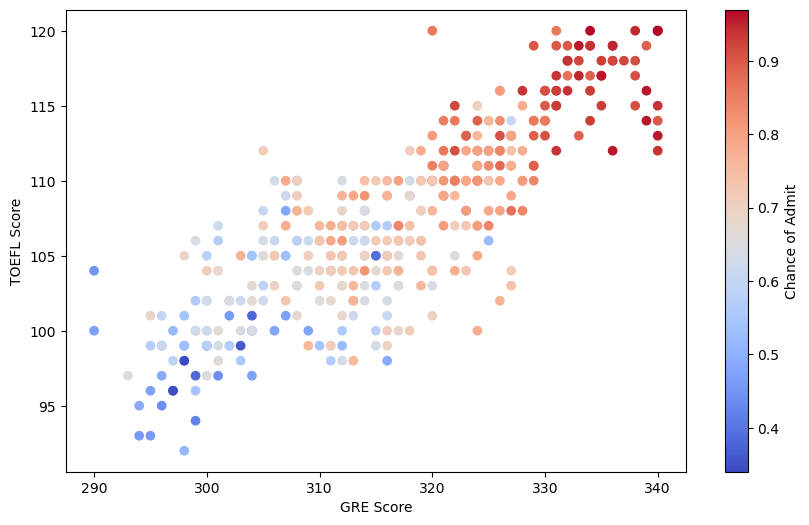

In [29]:
feature_x = 'GRE Score'
feature_y = 'TOEFL Score'

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[feature_x], data[feature_y], c=data['Chance of Admit '], cmap='coolwarm')
plt.colorbar(scatter, label='Chance of Admit')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()


По графику видна линейная зависимость от Y-переменной и можно предположить, что между данными X-признаками есть корреляция.